# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [50]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/lena.png` and show it:

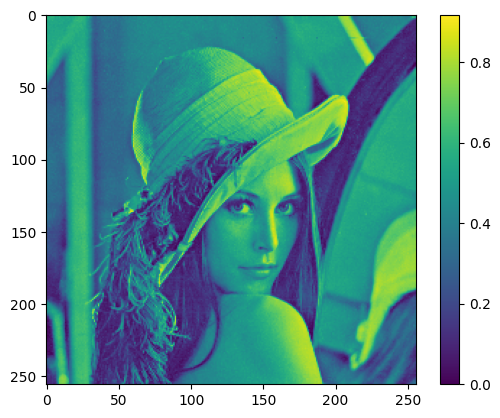

In [51]:
img = plt.imread('data/lena.png')
plt.imshow(img)
plt.colorbar() 
plt.show()

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [52]:
def meanfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        counter = 0
        neighborhood_sum = 0
        for q in numpy.ndindex(size, size):
            x = p[0]-n+q[0]
            y = p[1]-n+q[1]
            if 0 <= x < img.shape[0] and 0 <= y < img.shape[1]:
                neighborhood_sum = neighborhood_sum + img[x,y]
                counter = counter + 1
        if counter == size ** 2:    
            result[p] = neighborhood_sum / (size ** 2)
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

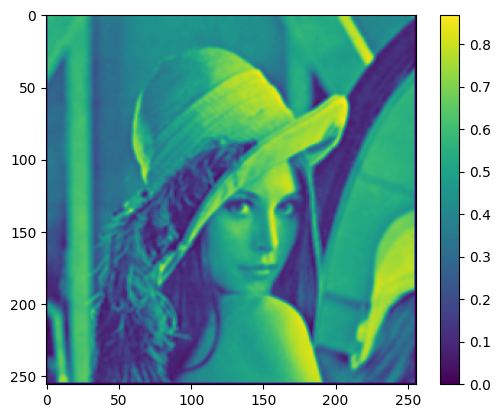

In [19]:
filter_size = 3
filtered_img = meanfilter(img, filter_size)
#plt.figure(figsize=(15,15)) -> Standardgröße
plt.imshow(filtered_img)
plt.colorbar() 
plt.show()

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/lena_meanfilter5.png`:

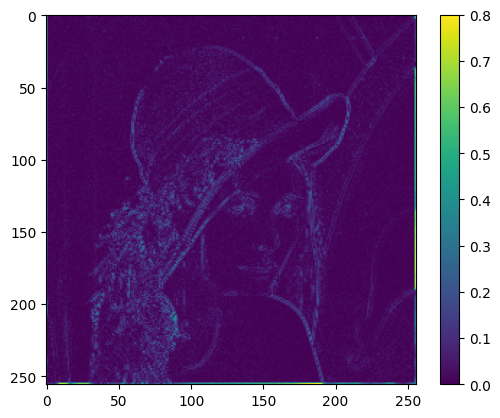

In [20]:
diff = numpy.abs(filtered_img - img)
plt.imshow(diff)
plt.colorbar()

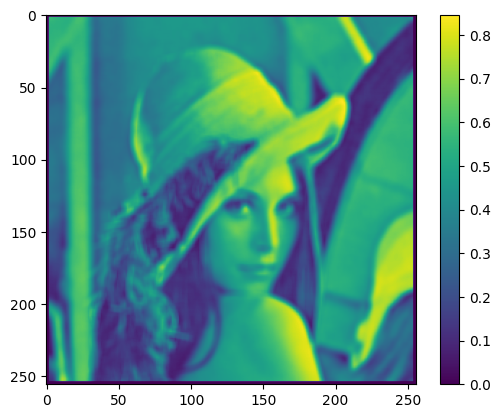

Images are close enough.


In [21]:
imgl5 = plt.imread('data/lena_meanfilter5.png')
filtered_img5 = meanfilter(img, 5)
plt.imshow(filtered_img5)
plt.colorbar() 
plt.show()
assert numpy.allclose(filtered_img5, imgl5, atol=1/255), "Images are not close enough."
print("Images are close enough.")


---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [22]:
def medianfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        counter = 0
        intensity_list = []
        for q in numpy.ndindex(size, size):
            x = p[0]-n+q[0]
            y = p[1]-n+q[1]
            if 0 <= x < img.shape[0] and 0 <= y < img.shape[1]:
                intensity_list.append(img[x,y])
                counter = counter + 1
        if counter == size ** 2:    
            result[p] = numpy.median(intensity_list)
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

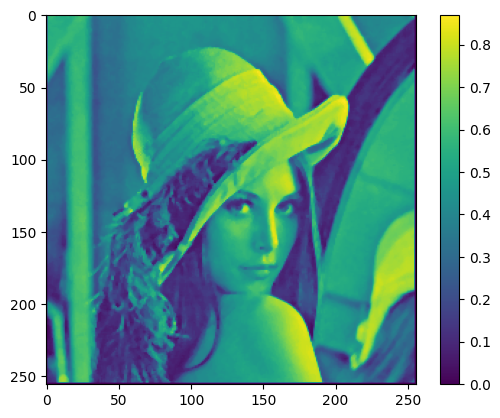

In [25]:
filter_size = 3
filtered_imgm = medianfilter(img, filter_size)
#plt.figure(figsize=(15,15)) -> Standardgröße
plt.imshow(filtered_imgm)
plt.colorbar() 
plt.show()

Then, compare your result for filter size `5` with the correct result image `data/lena_medianfilter5.png`:

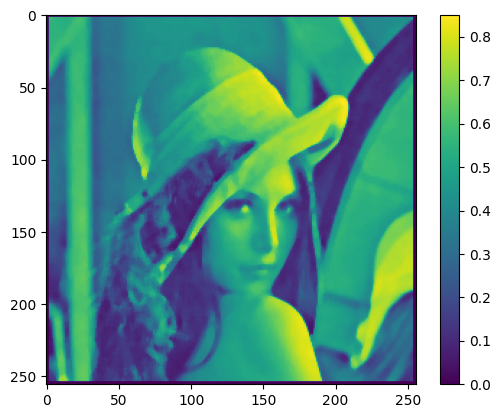

Images are close enough.


In [48]:
imgl5m = plt.imread('data/lena_medianfilter5.png')
filtered_img5m = medianfilter(img, 5)
plt.imshow(filtered_img5m)
plt.colorbar() 
plt.show()
assert numpy.allclose(filtered_img5m, imgl5m, atol=1/255), "Images are not close enough."
print("Images are close enough.")

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [53]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

In [54]:
plt.imshow(scipy.ndimage.uniform_filter(img(), 3))

TypeError: 'numpy.ndarray' object is not callable

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

In [39]:
plt.imshow(scipy.ndimage.median_filter(img(), 3))

TypeError: 'numpy.ndarray' object is not callable

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

In [40]:
plt.imshow(scipy.ndimage.gaussian_filter(img(), 3))

TypeError: 'numpy.ndarray' object is not callable

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [31]:
def fastfilter(img, size):
    n = (size - 1) // 2
    result = numpy.zeros(img.shape)
    for p in numpy.nindex(img.shape):
        if n <= p[0] < img.shape[0]- n and n <= p[1] < img.shape[1] - n:
            result[p] = img[p[0]-n:p[0]+n+1, p[1]-n:p[1]+n+1].mean()
    return result

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

In [41]:
plt.imshow(fastfilter(img(), 3))

TypeError: 'numpy.ndarray' object is not callable

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

In [44]:
assert numpy.allclose(meanfilter(img(), 3), fastfilter(img(), 3), atol = 1/255)

TypeError: 'numpy.ndarray' object is not callable

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

In [47]:
%timeit fastfilter(img(), 9)
%timeit meanfilter(img(), 9)

TypeError: 'numpy.ndarray' object is not callable

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: